<a href="https://colab.research.google.com/github/sharadnataraj96/Gas-Turbine-Emission-prediction/blob/Decision-Tree-Regression/Gas_Turbine_Decision_Tree_Regressison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
data_1 = pd.read_csv("/content/drive/My Drive/Dataset/gt_2011.csv")
X= data_1.iloc[:, :-2].values
Y=data_1.iloc[:, -2:].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [50]:
y_co_train = y_train[ :, :1]
y_co_test = y_test[ :, :1]
y_nox_train = y_train[ :, 1:]
y_nox_test = y_test[ :, 1:]

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_y_co = StandardScaler()
sc_y_nox = StandardScaler()
y_co_train = sc_y_co.fit_transform(y_co_train)
y_co_test = sc_y_co.fit_transform(y_co_test)
y_nox_train = sc_y_nox.fit_transform(y_nox_train)
y_nox_test = sc_y_nox.fit_transform(y_nox_test)

In [52]:
from sklearn.tree import DecisionTreeRegressor
regressor_co = DecisionTreeRegressor(random_state = 0)
regressor_nox = DecisionTreeRegressor(random_state = 0)

In [53]:
regressor_co.fit(X_train,y_co_train)
regressor_nox.fit(X_train, y_nox_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [54]:
y_co_pred = regressor_co.predict(X_test)
y_nox_pred = regressor_nox.predict(X_test)

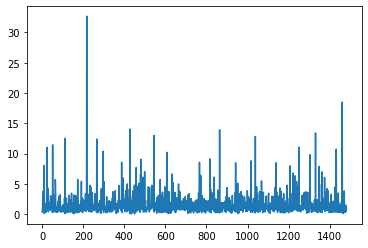

In [59]:
plt.plot(sc_y_co.inverse_transform(y_co_test))

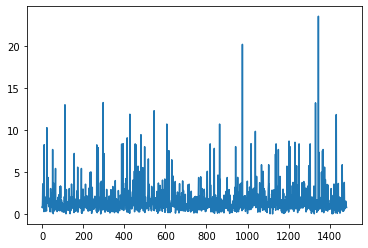

In [56]:
plt.plot(sc_y_co.inverse_transform(y_co_pred))

In [57]:
rss_co = np.sum(np.square(sc_y_co.inverse_transform(y_co_test) - sc_y_co.inverse_transform(y_co_pred)))


In [58]:
print(rss_co)

14307769.064982066


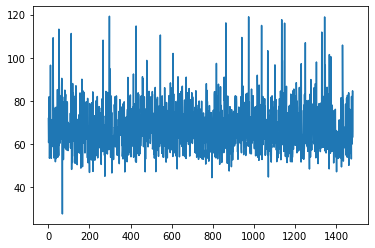

In [62]:
plt.plot(sc_y_nox.inverse_transform(y_nox_test))

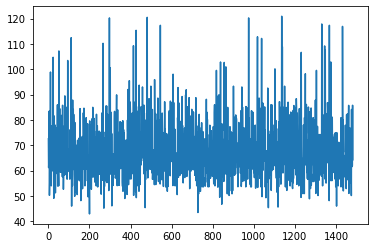

In [63]:
plt.plot(sc_y_nox.inverse_transform(y_nox_pred))

In [64]:
rss_nox = np.sum(np.square(sc_y_nox.inverse_transform(y_nox_test) - sc_y_nox.inverse_transform(y_nox_pred)))
